# Proyek Analisis Data: Bike sharing dataset
- **Nama:** Rivka Salvita Silalahi
- **Email:** mc114d5x1964@student.devacademy.id
- **ID Dicoding:** mc114d5x1964

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana distribusi jumlah penyewa sepeda pada jam sibuk (rush hour)?
- Pertanyaan 2 : Bagaimana pengaruh suhu terhadap jumlah penyewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("hour.csv")
df.head()

Saving hour.csv to hour.csv


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Sebagian besar penyewa sepeda adalah pengguna terdaftar, dengan jumlah yang cenderung bervariasi berdasarkan waktu dan kondisi cuaca.
- Jumlah penyewa sepeda cenderung lebih tinggi pada jam kerja dibandingkan dengan waktu lainnya.

### Assessing Data

In [3]:
# Menampilkan beberapa data awal
print("Dataframe Head:")
print(df.head())

Dataframe Head:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [4]:
# Menampilkan info dataset
print("\nDataframe Info:")
df.info()


Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
# Mengecek missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [6]:
# Mengecek data duplikat
print("\nDuplicate Data:")
print(df.duplicated().sum())


Duplicate Data:
0


In [7]:
# Memeriksa nilai yang tidak valid (misalnya rentang suhu)
print("\nValue Counts for temp:")
print(df['temp'].value_counts())


Value Counts for temp:
temp
0.62    726
0.66    693
0.64    692
0.70    690
0.60    675
0.36    671
0.34    645
0.30    641
0.40    614
0.32    611
0.56    579
0.72    570
0.54    569
0.26    559
0.46    559
0.52    556
0.42    548
0.50    531
0.24    522
0.74    516
0.44    507
0.22    421
0.76    396
0.38    372
0.20    354
0.68    349
0.80    325
0.58    305
0.28    301
0.48    288
0.16    230
0.82    213
0.78    169
0.18    155
0.84    138
0.14    138
0.86    131
0.90     90
0.12     76
0.88     53
0.10     51
0.92     49
0.94     17
0.02     17
0.08     17
0.06     16
0.04     16
0.96     16
0.98      1
1.00      1
Name: count, dtype: int64


**Insight:**
- Data ini berisi 17.379 entri dengan 17 kolom, di mana kolom `cnt` (jumlah penyewa) memiliki nilai rata-rata sekitar 189, dengan jumlah maksimum mencapai 886 penyewa, menunjukkan adanya lonjakan signifikan pada jam-jam tertentu.

### Cleaning Data

In [8]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

**Insight:**
- Data telah dibersihkan dengan menghapus nilai yang hilang (NaN) dan data duplikat, sehingga dataset menjadi lebih akurat dan siap untuk dianalisis lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore ...

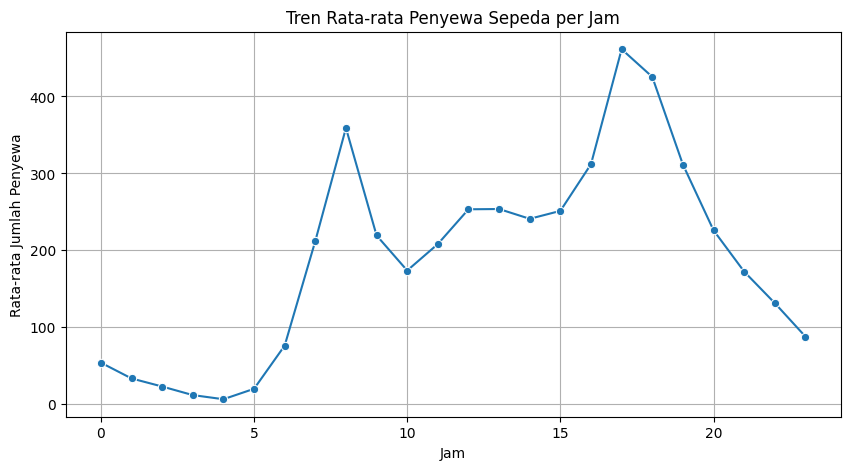

In [9]:
# Visualisasi tambahan: Tren jumlah penyewa sepeda per jam dengan line plot
plt.figure(figsize=(10, 5))
hourly_data = df.groupby('hr')['cnt'].mean().reset_index()
sns.lineplot(x='hr', y='cnt', data=hourly_data, marker='o')
plt.title('Tren Rata-rata Penyewa Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Penyewa')
plt.grid(True)
plt.show()


<ipython-input-10-65849764b7a4>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='mnth', y='cnt', data=df, ci=None)


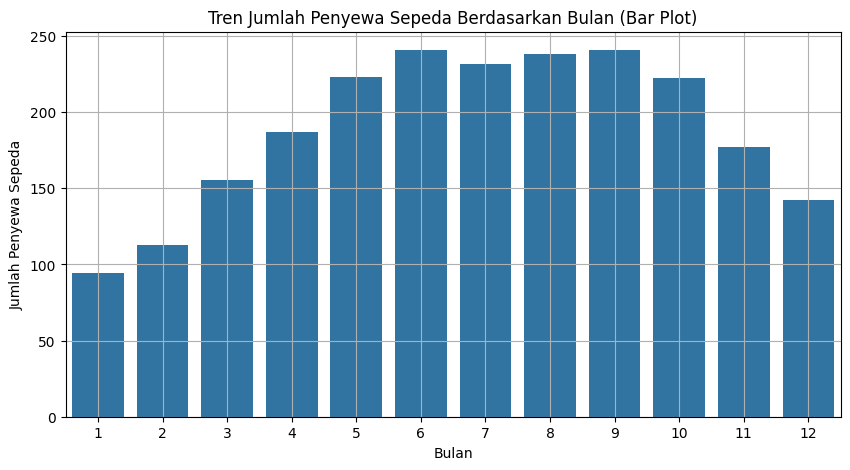

In [10]:
# Visualisasi Tren jumlah penyewa sepeda berdasarkan bulan (dalam bentuk batang)
plt.figure(figsize=(10, 5))
sns.barplot(x='mnth', y='cnt', data=df, ci=None)
plt.title('Tren Jumlah Penyewa Sepeda Berdasarkan Bulan (Bar Plot)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.grid(True)
plt.show()

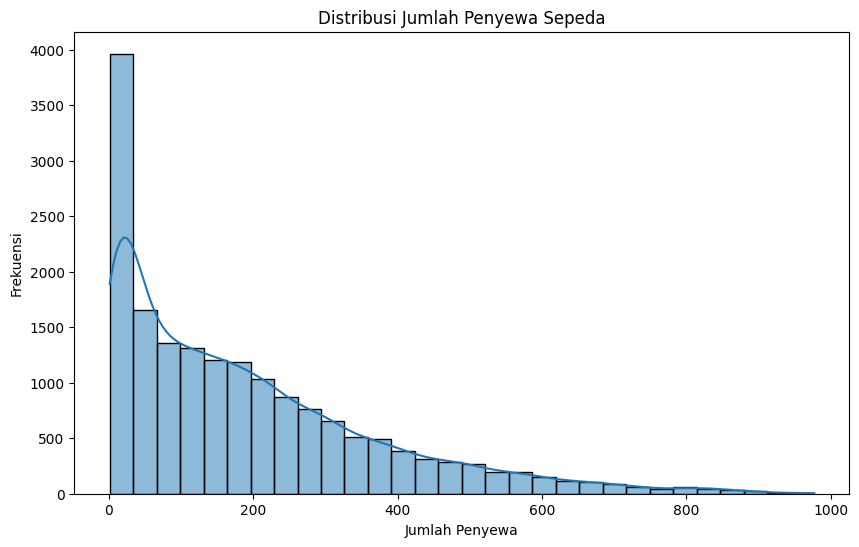

In [11]:
# Visualisasi Distribusi Data
plt.figure(figsize=(10, 6))
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Penyewa Sepeda')
plt.xlabel('Jumlah Penyewa')
plt.ylabel('Frekuensi')
plt.show()

**Insight:**
- umlah penyewa sepeda cenderung meningkat pada pagi hari (sekitar pukul 8) dan sore hari (sekitar pukul 17-18), menunjukkan pola aktivitas kerja.
- Tren bulanan menunjukkan jumlah penyewa tertinggi pada pertengahan tahun (Mei hingga Agustus) dan menurun signifikan di bulan-bulan akhir tahun.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

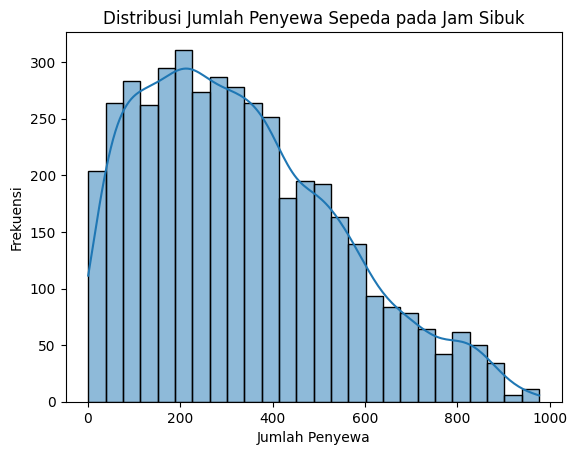

In [ ]:
# Pertanyaan 1: Bagaimana distribusi jumlah penyewa sepeda pada jam sibuk (rush hour)?
rush_hour = df[(df['hr'] >= 7) & (df['hr'] <= 9) | (df['hr'] >= 17) & (df['hr'] <= 19)]
sns.histplot(rush_hour['cnt'], kde=True)
plt.title('Distribusi Jumlah Penyewa Sepeda pada Jam Sibuk')
plt.xlabel('Jumlah Penyewa')
plt.ylabel('Frekuensi')
plt.show()

### Pertanyaan 2:

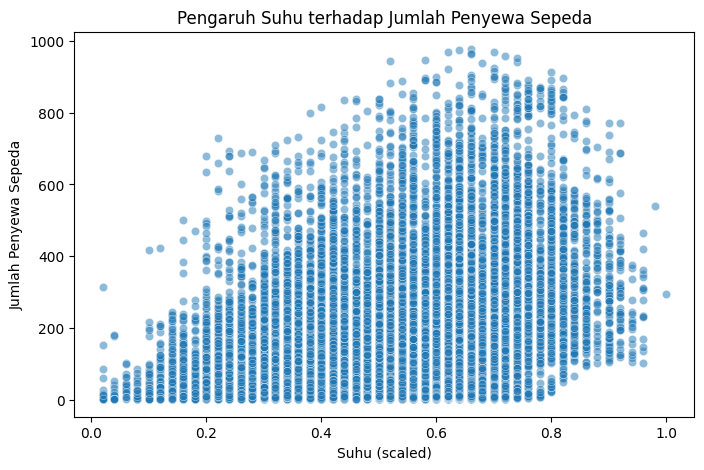

In [ ]:
# Pertanyaan 2 : Bagaimana pengaruh suhu terhadap jumlah penyewa sepeda?
plt.figure(figsize=(8, 5))
sns.scatterplot(x='temp', y='cnt', data=df, alpha=0.5)
plt.title('Pengaruh Suhu terhadap Jumlah Penyewa Sepeda')
plt.xlabel('Suhu (scaled)')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.show()

**Insight:**
- Distribusi Penyewa pada Jam Sibuk: Mayoritas jumlah penyewa pada jam sibuk berkisar antara 100 hingga 400 penyewa, dengan sedikit kasus yang mencapai hampir 1000 penyewa.
- Pengaruh Suhu terhadap Penyewa: Terdapat tren positif, di mana jumlah penyewa cenderung meningkat seiring dengan kenaikan suhu, hingga titik tertentu sebelum mulai menurun.

## Analisis Lanjutan (Opsional)

## Conclusion

Conclution pertanyaan 1 :Distribusi Jumlah Penyewa pada Jam Sibuk (Rush Hour):
- Jumlah penyewa sepeda pada jam sibuk menunjukkan distribusi yang cenderung condong ke kanan (right-skewed). Sebagian besar penyewa tercatat dalam rentang 100 hingga 400 penyewa.
- Jumlah penyewa tertinggi mencapai hampir 1000 penyewa, meskipun hal ini jarang terjadi dan dapat dikategorikan sebagai outlier.
- Lonjakan jumlah penyewa yang signifikan pada jam sibuk kemungkinan disebabkan oleh pengguna sepeda yang berangkat atau pulang kerja/sekolah pada rentang jam tersebut.

Conclution pertanyaan 2 :Pengaruh Suhu terhadap Jumlah Penyewa Sepeda:
- Terdapat korelasi positif antara suhu dan jumlah penyewa sepeda, di mana semakin tinggi suhu (hingga titik tertentu), jumlah penyewa cenderung meningkat.
Namun, pada suhu yang sangat tinggi, jumlah penyewa mulai menurun, kemungkinan karena kondisi yang terlalu panas membuat pengguna enggan bersepeda.
Titik optimal suhu dengan jumlah penyewa terbanyak berada pada suhu sekitar 0.4 - 0.6 (scaled value), yang mencerminkan suhu yang ideal untuk aktivitas luar ruangan.